In [86]:
# 
import json
import cv2
import requests
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.iai.v20200303 import iai_client, models
from tencentcloud.ft.v20200304 import ft_client
from tencentcloud.ft.v20200304 import models as ft_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [61]:
img_path="./images/test2.jpg"

In [62]:
"""
https://cloud.tencent.com/document/product/867/44989
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "iai.tencentcloudapi.com"
    
    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = iai_client.IaiClient(cred, "ap-beijing", clientProfile) 

    req = models.DetectFaceAttributesRequest()
    
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'), 
        "NeedRotateDetection": 1, # 是否开启图片旋转识别支持。0为不开启，1为开启
        "NeedFaceAttributes":1, # 是否需要返回人脸属性信息（FaceAttributesInfo）
        "NeedQualityDetection":1 #是否开启质量检测。0 为关闭，1 为开启。默认为 0。
    }
    req.from_json_string(json.dumps(params))

    resp = client.DetectFaceAttributes(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 



{'ImageWidth': 300, 'ImageHeight': 300, 'FaceDetailInfos': [{'FaceRect': {'X': 73, 'Y': 78, 'Width': 135, 'Height': 176}, 'FaceDetailAttributesInfo': {'Age': 0, 'Beauty': 0, 'Emotion': {'Type': 0, 'Probability': 0}, 'Eye': {'Glass': {'Type': 0, 'Probability': 0}, 'EyeOpen': {'Type': 0, 'Probability': 0}, 'EyelidType': {'Type': 0, 'Probability': 0}, 'EyeSize': {'Type': 0, 'Probability': 0}}, 'Eyebrow': {'EyebrowDensity': {'Type': 0, 'Probability': 0}, 'EyebrowCurve': {'Type': 0, 'Probability': 0}, 'EyebrowLength': {'Type': 0, 'Probability': 0}}, 'Gender': {'Type': 0, 'Probability': 0}, 'Hair': {'Length': {'Type': 0, 'Probability': 0}, 'Bang': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'Hat': {'Style': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'HeadPose': {'Pitch': 0, 'Yaw': 0, 'Roll': 0}, 'Mask': {'Type': 0, 'Probability': 0}, 'Mouth': {'MouthOpen': {'Type': 0, 'Probability': 0}}, 'Moustache': {'Type': 0, 'Probability': 0}, 'Nos

In [63]:
X=resp['FaceDetailInfos'][0]['FaceRect']["X"]
Y=resp['FaceDetailInfos'][0]['FaceRect']["Y"]
Width=resp['FaceDetailInfos'][0]['FaceRect']["Width"]
Height=resp['FaceDetailInfos'][0]['FaceRect']["Height"]
ImageWidth=resp['ImageWidth']
ImageHeight=resp['ImageHeight']

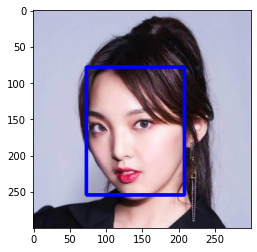

In [64]:
res=cv2.rectangle(plt.imread(img_path),(X,Y), (X+Width,Y+Height),(0,0,255), 4)
plt.imshow(res)

In [65]:
"""
https://console.cloud.tencent.com/
api/explorer?Product=ft&Version=2020-03-04&Action=ChangeAgePic&SignVersion=
人脸年龄变化

"""

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ft.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ft_client.FtClient(cred, "ap-beijing", clientProfile) 

    req = ft_models.ChangeAgePicRequest()
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'),
#         "Url": "",
        "AgeInfos": [
            {
                "Age": 80,
                "FaceRect": {
                    "Y": Y,
                    "X": X,
                    "Width": Width,
                    "Height": Height
                }
            }
        ],
        "RspImgType": "base64"
    }
    req.from_json_string(json.dumps(params))

    resp = client.ChangeAgePic(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ResultImage': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAEsASwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD78hh8yrUNt5f7tKEh+fPl1aRPev0KR54J/DHUmz/Z/Sm/cSm7/wDa/WsQJKjoooAKKKcU/vmgBtGP+mX6U793RJ2oAbRRRWYBQ/yUUUAOdI9lH97ZTaPue2K0ANmyij7/AL5pssqRozyvhf7++gB1OSN

In [66]:
resp['ResultImage']
type(resp['ResultImage'])

str

In [77]:
with open("./images/人脸年龄变化.jpg","wb") as file:
    file.write(base64.b64decode(resp['ResultImage']))
           

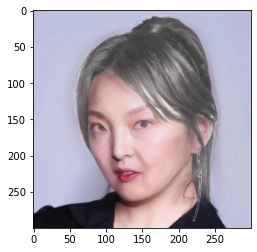

In [68]:
face=plt.imread("./images/人脸年龄变化.jpg")
plt.imshow(face)


In [69]:
"""
https://console.cloud.tencent.com/api
/explorer?Product=ft&Version=2020-03-04&Action=SwapGenderPic&SignVersion=
人脸性别转换
"""

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ft.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ft_client.FtClient(cred, "ap-beijing", clientProfile) 

    req = ft_models.SwapGenderPicRequest()
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'),
#         "Url": "",
        "GenderInfos": [
            {
                "Gender":1,  # 选择转换方向，0：男变女，1：女变男。
                "FaceRect": {
                    "Y": Y,
                    "X": X,
                    "Width": Width,
                    "Height": Height
                }
            }
        ],
        "RspImgType": "base64"
    }
    req.from_json_string(json.dumps(params))

    resp = client.SwapGenderPic(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ResultImage': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAEsASwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6oRN1TpFt4FAT5ulTKtfWM5AXsKfj2pPuim596zAfTKKKACiinbfWgBtGP9mncUNQA2iiioAKG+WiigBzKNtHrim0fdqwDbiij71I8iopLNgeuaAForJ1vxTpfh6zmutQu47S3iUu0jngD1r5o+IP7fH

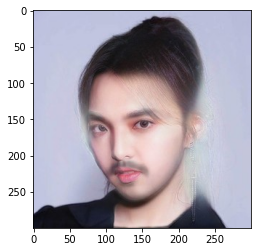

In [70]:
with open("./images/人脸性别转换.jpg","wb") as file:
    file.write(base64.b64decode(resp['ResultImage']))
face=plt.imread("./images/人脸性别转换.jpg")
plt.imshow(face)           

In [73]:
"""
https://console.cloud.tencent.com
/api/explorer?Product=ft&Version=2020-03-04&Action=FaceCartoonPic&SignVersion=
人像动漫化
"""

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ft.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ft_client.FtClient(cred, "ap-beijing", clientProfile) 

    req = ft_models.FaceCartoonPicRequest()
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'),
#         "Url": "",
        "RspImgType": "base64",
        "DisableGlobalEffect": "false" #  关闭全图动漫化，传入true（不分大小写）即关闭全图动漫化。
    }
    req.from_json_string(json.dumps(params))

    resp = client.FaceCartoonPic(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ResultImage': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAEsASwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD35FaRt0hLHtmrUaMpwmD6E1GhOcgDGe9ToSMjIH6Zrok2dViRc7sDn3qQu2SMjHr61FvIG0ED36ZoEmfTI9R1qNRk2Xx1H0pCzAdR9KjL9ywoL9xg0tQHF228Yphz1yB7UhkOeSKRiBltw9qeoWHbmA+

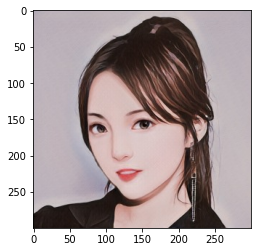

In [76]:
with open("./images/人像动漫化.jpg","wb") as file:
    file.write(base64.b64decode(resp['ResultImage']))
face=plt.imread("./images/人像动漫化.jpg")
plt.imshow(face)           

In [100]:
# 人像渐变相关接口

"""
https://console.cloud.tencent.com/
api/explorer?Product=ft&Version=2020-03-04&Action=MorphFace&SignVersion=
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ft.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ft_client.FtClient(cred, "ap-beijing", clientProfile) 

    req = ft_models.MorphFaceRequest()
    params = {
#         "Images": [ "", "" ],
        "Urls": [ 
           
            
            "https://img1.baidu.com/it/u=2126193839,3539866218&fm=26&fmt=auto&gp=0.jpg",
            "https://img0.baidu.com/it/u=650443764,2599269051&fm=26&fmt=auto&gp=0.jpg",
            "https://img0.baidu.com/it/u=547342127,1441324804&fm=26&fmt=auto&gp=0.jpg",
            "https://img1.baidu.com/it/u=2454909000,4238359436&fm=26&fmt=auto&gp=0.jpg",
            "https://img2.baidu.com/it/u=535504063,4083148724&fm=26&fmt=auto&gp=0.jpg",
        ],
        "GradientInfos": [
            {
                "Tempo": 0.7,
                "MorphTime": 0.5
            }
        ],
        "Fps": 25,
        "OutputType": 0, # mp4
        "OutputWidth": 720,
        "OutputHeight": 1280
    }
    req.from_json_string(json.dumps(params))

    resp = client.MorphFace(req).to_json_string() 
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'JobId': 'o3rBjXF08JgFOH9p', 'EstimatedProcessTime': 30, 'RequestId': '92a27512-33a4-4afb-804f-e6a300883025'}


In [102]:
JobId=resp['JobId']
JobId

'o3rBjXF08JgFOH9p'

In [117]:

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ft.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ft_client.FtClient(cred, "ap-beijing", clientProfile) 

    req = ft_models.QueryFaceMorphJobRequest()
    params = {
        "JobId": JobId
    }
    req.from_json_string(json.dumps(params))

    resp = client.QueryFaceMorphJob(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'JobStatus': '处理完成', 'FaceMorphOutput': {'MorphUrl': 'http://bda-video-bodyseg-1254418846.cos.ap-guangzhou.myqcloud.com/video_morph_prod/1/1304700566/20210820101951_92a27512-33a4-4afb-804f-e6a300883025_result.mp4', 'MorphMd5': '0B756046E5055B1D699FD1E6B7CD9A75', 'CoverImage': ''}, 'RequestId': '494f9deb-72c2-46cc-bb89-a2a754594da3'}


In [118]:
resp["FaceMorphOutput"]['MorphUrl']

'http://bda-video-bodyseg-1254418846.cos.ap-guangzhou.myqcloud.com/video_morph_prod/1/1304700566/20210820101951_92a27512-33a4-4afb-804f-e6a300883025_result.mp4'

In [120]:
with open('./video/人像渐变.mp4','wb') as file:
    file.write(requests.get(resp["FaceMorphOutput"]['MorphUrl']).content)